In [ ]:
#Exponential distribution used to partition arbitrary network into many low-diameter components with a bounded number of inter-component edges to partition an nxn grid.
#exponential_clock_simuation(lamb,n) simulates the algorithm above on a n x n grid with lambda output into a matrix[][] representing the partition of the cells where cells in the same partition should have the same number.
#draw_matrix(matrix) draws the matrix.

In [2]:

from pylab import *
import queue

In [3]:
def exponential_clock_simulation(lamb, n):
    direction = array([[0,-1],[0,1],[1,0], [-1,0]])       

    matrix = zeros((n, n))
    for i in range(n):
        for j in range(n):
            matrix[i][j] = i*n+j

    clock = zeros((n, n))

    for i in range(n):
        for j in range(n):
            clock[i][j] = np.random.exponential(lamb)

    max_clock = np.max(clock)

    q = queue.PriorityQueue()
    distance = zeros((n, n))
    for i in range(n):
        for j in range(n):
            distance[i][j] = max_clock - clock[i][j]
            q.put((distance[i][j], i, j))

    while not q.empty():
        now = q.get()
        now_x = now[1]
        now_y = now[2]
        for i in range(4):
            next_x = now_x + direction[i][0]
            next_y = now_y + direction[i][1]
            if(0<=next_x <n and 0<=next_y<n and distance[next_x][next_y] > distance[now_x][now_y] + 1):
                distance[next_x][next_y] = distance[now_x][now_y] + 1
                q.put((distance[next_x][next_y], next_x, next_y))
                matrix[next_x][next_y]=matrix[now_x][now_y]
    return matrix



In [4]:
def draw_matrix(matrix):
    figure()
    imshow(matrix, alpha=0.8)

In [5]:
def max_diameter(matrix):
    rows = len(matrix)
    columns = len(matrix[0])
    if(rows != columns):
        print("it's not a square matrix!")
        return 0
    n = rows
    
    used = zeros((n, n))
    distance = zeros((n,n))

    for i in range(n):
        for j in range(n):
            distance[i][j] = 1000000000

    direction = array([[0,-1],[0,1],[1,0], [-1,0]])  

    max_distance = 0
    for i in range(n):
        for j in range(n):

            max_x = i
            max_y = j
            if(used[i][j]==0):

                q = queue.Queue()
                q.put((0, i, j))
                used[i][j]=1
                distance[i][j]=0

                while not q.empty():
                    now = q.get()
                    now_x = now[1]
                    now_y = now[2]
                    for k in range(4):
                        next_x = now_x + direction[k][0]
                        next_y = now_y + direction[k][1]
                        if(0<=next_x <n and 0<=next_y<n and used[next_x][next_y]==0 and matrix[next_x][next_y]==matrix[now_x][now_y]):
                            distance[next_x][next_y] = distance[now_x][now_y] + 1
                            q.put((distance[next_x][next_y], next_x, next_y))
                            used[next_x][next_y]= 1
                            if(distance[next_x][next_y] > max_distance):
                                max_distance = distance[next_x][next_y]
    print("max_diameter = " + str(max_distance))
    return max_distance

In [6]:
def count_boundary(matrix):
    rows = len(matrix)
    columns = len(matrix[0])
    if(rows != columns):
        print("it's not a square matrix!")
        return 0
    n = rows
    
    direction = array([[0,1],[1,0]])
    counter=0
    
    for i in range(n-1):
        for j in range(n-1):
            for k in range(2):
                next_i = i + direction[k][0]
                next_j = j + direction[k][1]
                if(matrix[i][j]!=matrix[next_i][next_j]):
                    counter+=1
                    
                    
    print("number of inter-component adjacencies over the total number of adjacencies: " + str(counter/(2*(n*(n-1)))))
    return counter

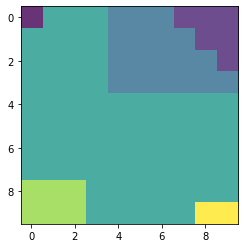

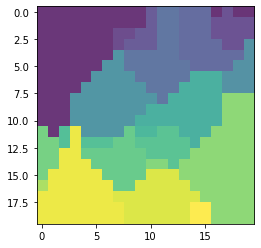

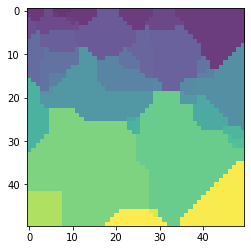

In [8]:

matrix = exponential_clock_simulation(2,10)
draw_matrix(matrix)
matrix = exponential_clock_simulation(3,20)
draw_matrix(matrix)
matrix = exponential_clock_simulation(4,50)
draw_matrix(matrix)

number of inter-component adjacencies over the total number of adjacencies: 0.1432828282828283
max_diameter = 39.0


39.0

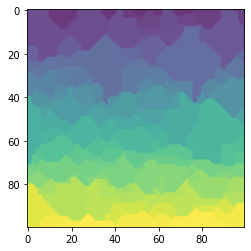

In [13]:
matrix = exponential_clock_simulation(3.5,100)
draw_matrix(matrix)
count_boundary(matrix)
max_diameter(matrix)